# Определение возраста покупателей

## Исследовательский анализ данных

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


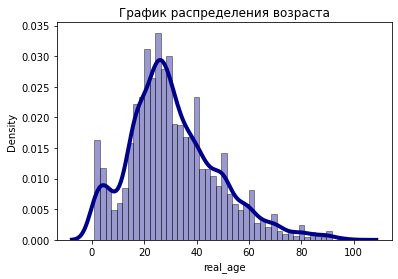

In [21]:
sns.distplot(labels['real_age'], hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('График распределения возраста')
plt.show()

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=12,
        class_mode='raw',
        seed=12345) 


Found 7591 validated image filenames.


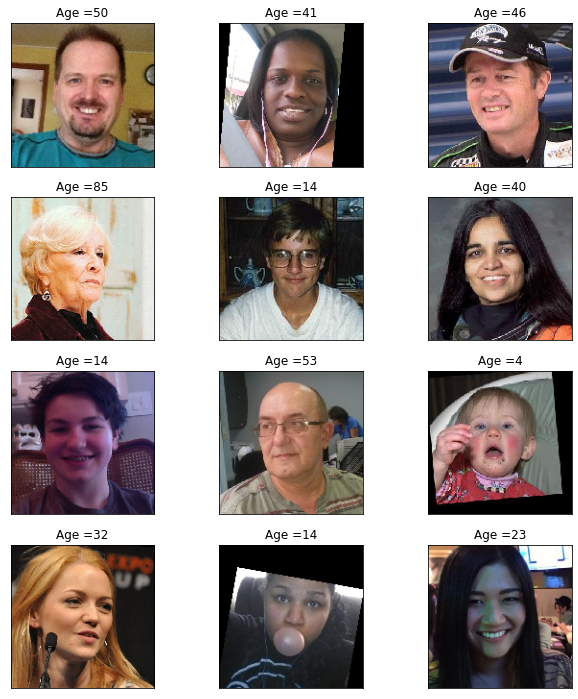

In [29]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 3, i+1)
    plt.imshow(features[i])
    plt.tight_layout()
    plt.title('Age ={}'.format(target[i]), loc='center')    
    plt.xticks([])
    plt.yticks([])
    

**Вывод**\
\
В данных 7591 позиция с возрастами и соответствующими фотографиями. В данных по графику распределения заметен пик около 28 лет. Присутствуют как посетители с малым возрастом около 1 года так и с большим - около 90 лет. На выведенных фотографиях значится возраст из данных. По данным 12 фотографиям незаметны несоответсвия.

## Обучение модели

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
                                    validation_split=0.25,
                                    rescale=1./255,
                                    horizontal_flip=True,
                                    vertical_flip=True)
    train_datagen_flow = train_datagen.flow_from_dataframe(
      dataframe=labels,
      directory=path + 'final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(150, 150),
      batch_size=16,
      class_mode='raw',
      subset='training',
      seed=12345)

    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
                                    validation_split=0.25,
                                    rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
      dataframe=labels,
      directory=path + 'final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(150, 150),
      batch_size=16,
      class_mode='raw',
      subset='validation',
      seed=12345)

    return test_gen_flow

def create_model(input_shape):
    optimizer = Adam(learning_rate = 0.0001)
    backbone = ResNet50(input_shape=input_shape, weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

    model = Sequential()

    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

In [ ]:

Train for 356 steps, validate for 119 steps
Epoch 1/10
2023-06-27 17:55:31.733904: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-06-27 17:55:32.200085: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 65s - loss: 252.9407 - mae: 11.7218 - val_loss: 798.6307 - val_mae: 23.3464
Epoch 2/10
356/356 - 49s - loss: 119.7607 - mae: 8.3636 - val_loss: 142.1756 - val_mae: 9.0372
Epoch 3/10
356/356 - 47s - loss: 98.8996 - mae: 7.6016 - val_loss: 105.3899 - val_mae: 8.0863
Epoch 4/10
356/356 - 47s - loss: 75.2065 - mae: 6.6556 - val_loss: 110.4779 - val_mae: 7.9825
Epoch 5/10
356/356 - 39s - loss: 66.9376 - mae: 6.2108 - val_loss: 101.4091 - val_mae: 7.4568
Epoch 6/10
356/356 - 41s - loss: 53.4599 - mae: 5.5851 - val_loss: 83.5054 - val_mae: 6.8992
Epoch 7/10
356/356 - 46s - loss: 45.8600 - mae: 5.1751 - val_loss: 93.4492 - val_mae: 7.3751
Epoch 8/10
356/356 - 47s - loss: 40.6998 - mae: 4.8564 - val_loss: 86.3522 - val_mae: 7.0475
Epoch 9/10
356/356 - 46s - loss: 37.0085 - mae: 4.6150 - val_loss: 82.4773 - val_mae: 6.7837
Epoch 10/10
356/356 - 49s - loss: 30.8225 - mae: 4.2371 - val_loss: 85.0429 - val_mae: 6.8991
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 11s - loss: 85.0429 - mae: 6.8991
Test MAE: 6.8991

## Анализ обученной модели

**Вывод**\
\
Изучались фотографии клиентов сети "Хлеб-Соль". В данных находится 7591 фотография со значениями возрастов. Из графика распределения видно, что преобладающий возраст - это возраст клиентов около 28 лет. Для ознакомления были выведены несколько фотографий размером (150, 150). Для предсказания возраста клиента по фотографии использовалась архитектура свёрточных нейросетей  ResNet50. С помощью неё получилось добиться MAE равным 6.8991, что является хорошим результатом.